# Libs Key Functions related with Chapter 5 & A Mock Midterm
### Disclaimer: This material is shared to help enhance understanding of related concepts and libs. It is not representative of the actual midterm exam and should be used only for educational purposes. 
#### *Author Alex Zhang*

# NumPy Functions

### numpy.linalg.solve 
- Used to solve linear equations, which can be useful in some methods involving Jacobian matrices or linear approximations.

### numpy.linspace 
- To generate linearly spaced vectors, helpful when plotting or evaluating functions across a range.

### numpy.isclose 
- Useful to determine if convergence criteria are met, e.g., to compare if two floating point numbers are "close enough.

### numpy.roots (optional, seems not used in Chapter 5)
- To find roots of polynomials.

### numpy.gradient (optional, seems better in Chapter 6)
- For calculating numerical derivatives, useful in methods like Newton's. A special case of Jacobian matrix, better to use in Chapter 6


In [1]:
import numpy as np

# usage of numpy.linalg.solve
# Inside there are LU, Cholesky(LL^T), QR, SVD decomposition, eigenvalue decomposition, etc.
A = np.array([[2, 1], [1, -1]])
b = np.array([5, 1])
x = np.linalg.solve(A, b)
print(f"Solution vector x: {x}")

# usage of numpy.roots
# f(x)=x^3 − 6x^2 + 11x −6
coefficients = [1, -6, 11, -6]
roots = np.roots(coefficients)
print(f"Roots of the polynomial: {roots}")

# usage of numpy.isclose
# the "==" is not suitable for comparing floating point numbers, as in python, the float has a presicion limitiation
a = np.array([0.1 + 0.2, 1.0, 0.333])
b = np.array([0.3, 1.0000001, 1/3])
comparison = np.isclose(a, b, atol=1e-7)
print(f"Comparison result: {comparison}")


Solution vector x: [2. 1.]
Roots of the polynomial: [3. 2. 1.]
Comparison result: [ True  True False]


# SciPy Functions
### scipy.optimize.bisect 
- For the bisection method, which is directly mentioned as one of the main algorithms.

### scipy.optimize.newton 
- Implements Newton's method to find roots of functions.

### scipy.optimize.fixed_point 
- Implements fixed-point iteration, which can be helpful if you're dealing with problems involving fixed-point iterations.

### scipy.optimize.fsolve 
- To solve systems of nonlinear equations, particularly useful for multi-dimensional cases like Section 5.6, Newton Method in Nonlinear Equations

# Recommended Practice

## Interval Bisection: 
Practice using **scipy.optimize.bisect**. Write code to solve different example functions using interval bisection and get comfortable setting the interval and stopping criteria.

In [2]:
from scipy.optimize import bisect

def f(x):
    return x**2 - 2

root = bisect(f, 0, 2)
print(f'the bisect root is {root}')

# implement the bisection method manually
def bisection_manual(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) > 0:
        raise ValueError('f(a) and f(b) must have different signs')
    
    for i in range(max_iter):
        c = (a + b) / 2
        if f(c) == 0 or (b - a) / 2 < tol:
            return c
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    
    return c

root = bisection_manual(f, 0, 2)
print(f'the manual bisect root is {root}')


the bisect root is 1.4142135623715149
the manual bisect root is 1.4142141342163086


## Newton's Method: 
Use scipy.optimize.newton and practice solving functions involving derivatives. Understand how to handle situations where convergence might not occur.

In [3]:
from scipy.optimize import newton
import numpy as np

def f(x):
    return x**2 - 2

def f_prime(x):
    return 2 * x

root = newton(f, 1)
print(f'the newton root without manual fprime is {root}')

root = newton(f, 1, f_prime)
print(f'the newton root with manual fprime is {root}')


# implement the newton method manually
def newton_manual(f, f_prime, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        x_new = x - f(x) / f_prime(x)
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x

root = newton_manual(f, f_prime, 1)
print(f'the manual newton root is {root}')


the newton root without manual fprime is 1.414213562373095
the newton root with manual fprime is 1.4142135623730951
the manual newton root is 1.4142135623730951


## Secant Method:
Use **scipy.optimiza.newton**. If you provide two starting points but no derivative (fprime), this function uses the Secant Method instead of the standard Newton's method. 

In [4]:
from scipy.optimize import newton
# Define the function for which we want to find the root
def f(x):
    return x**2 - 2

# Use Newton's method in secant mode by providing two initial guesses
root = newton(f, x0=2, x1=3)
print(f"The root found by the Secant Method is: {root}")

# Implement the Secant Method manually
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        # Calculate the new approximation
        f_x0 = f(x0)
        f_x1 = f(x1)
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)

        # Check convergence
        if abs(x2 - x1) < tol:
            return x2

        # Update points for next iteration
        x0, x1 = x1, x2

    raise ValueError("Secant method did not converge within the given number of iterations")

# Example usage
root = secant_method(lambda x: x**2 - 2, 2, 3)
print(f"The root found by manual Secant Method is: {root}")

The root found by the Secant Method is: 1.4142135623730951
The root found by manual Secant Method is: 1.4142135623766205


## Fixed-Point Iteration: 
Use scipy.optimize.fixed_point for practice. This method is less common but understanding it will help with conceptual questions.


In [5]:
from scipy.optimize import fixed_point

# f(x)=x^3−2x−5
# make x = g(x) = (2x + 5)^(1/3)
# make sure |g(x*)_prime| < 1, better to be 0
# Define the function for which we want to find the root
def g(x):
    return (2 * x + 5) ** (1 / 3)

# Use Fixed-Point Iteration to find the root
root = fixed_point(g, x0=2)  # Initial guess 2
print(f"The root found by Fixed-Point Iteration using SciPy is: {root}")

# define the fixed point iteration manually
def fixed_point_manual(g, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        x_new = g(x)
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x

def g(x):
    return (2 * x + 5) ** (1 / 3)

root = fixed_point_manual(g, 2)
print(f"The root found by manual Fixed-Point Iteration is: {root}")


The root found by Fixed-Point Iteration using SciPy is: 2.094551481542327
The root found by manual Fixed-Point Iteration is: 2.094551303182761


## Hybrid methods
If next approximate solution given by fast method falls outside bracketing interval, perform one iteration of safe method, such as bisection \
(About convergency derivation? Haven't prove yet, but I think that's converge)

In [6]:
# define the function and prime
def f(x):
    return x**3 - 2*x - 5

def f_prime(x):
    return 3*x**2 - 2

# hybrid method
def safeguarded_newton(f, f_prime, a, b, tol=1e-6, max_iter=100):
    # Start with the midpoint of the interval as the initial guess
    x0 = (a + b) / 2
    
    for i in range(max_iter):
        # Calculate the new approximation using Newton's method
        f_x0 = f(x0)
        f_prime_x0 = f_prime(x0)
        
        if f_prime_x0 == 0:  # Safeguard against division by zero
            x0 = (a + b) / 2
        else:
            x_newton = x0 - f_x0 / f_prime_x0
        
            # If Newton's method goes out of the interval, use bisection
            if x_newton < a or x_newton > b:
                x0 = (a + b) / 2
            else:
                x0 = x_newton

        # Update the interval
        if f(a) * f(x0) < 0:
            b = x0
        else:
            a = x0

        # Check convergence
        if abs(f(x0)) < tol:
            return x0

    raise ValueError("Safeguarded Newton's method did not converge within the given number of iterations")

# Example usage
root = safeguarded_newton(f, f_prime, a=1, b=3)
print(f"The root found by Safeguarded Newton's Method is: {root}")


The root found by Safeguarded Newton's Method is: 2.094551481698199


## Newton's method for nonlinear systems:

In [7]:
import scipy.optimize as opt
import numpy as np

# Example: define the system of equations
# x^2 + y^2 - 4 = 0
# e^x + y - 1 = 0

# Define the function that returns the system of equations
def F(x) -> np.ndarray:
    # let x[0] is x, x[1] is y
    return np.array([
        x[0]**2 + x[1]**2 - 4,
        np.exp(x[0]) + x[1] - 1
    ]) 

def J(x) -> np.ndarray:
    return np.array([
        [2*x[0], 2*x[1]],
        [np.exp(x[0]), 1]
    ])

# Implement the Newton nonlinear system method maunally
def newton_system(F, J, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        F_x = F(x)
        J_x = J(x)

        S_k = np.linalg.solve(J_x, -F_x)
        x = x + S_k

        if np.linalg.norm(S_k) < tol:
            return x
    return x

# Example usage
root = newton_system(F, J, x0=np.array([1, 1]))
print(f"The root found by Newton's method for nonlinear systems is: {root}")

# use scipy to solve the nonlinear system
x_0 = np.array([1, 1])
opt.fsolve(F, x_0)
print(f"The root found by fsolve is: {root}")


The root found by Newton's method for nonlinear systems is: [-1.81626407  0.8373678 ]
The root found by fsolve is: [-1.81626407  0.8373678 ]


# Mock Midterm

---

In fluid dynamics, the flow of fluid in a pipeline system is influenced by pipe resistance and pressure difference. Suppose we have a simple pipeline system where the flow rate $Q$ and pressure difference $P$ have a nonlinear relationship. To better understand the flow dynamics, we will use several numerical methods to analyze the flow rate and pressure relationship.

#### Background Equation
The relationship between fluid flow rate  and pressure difference  can be described by the following nonlinear equation:

$$
P=a \times Q^2 + b \times Q + c
$$

where $a, b ,c$ are known constants, and $a > 0$ represents the nonlinear resistance in the flow process.

---

## Exercise 1

Suppose the values of $a, b, c$ vary depending on the pipe conditions. Randomly generate multiple values for $a, b, c$ and plot the nonlinear relationship between flow rate $q$ and pressure difference $P$. Compare the resistance characteristics of the pipes under different conditions by visualizing these curves using matplotlib.

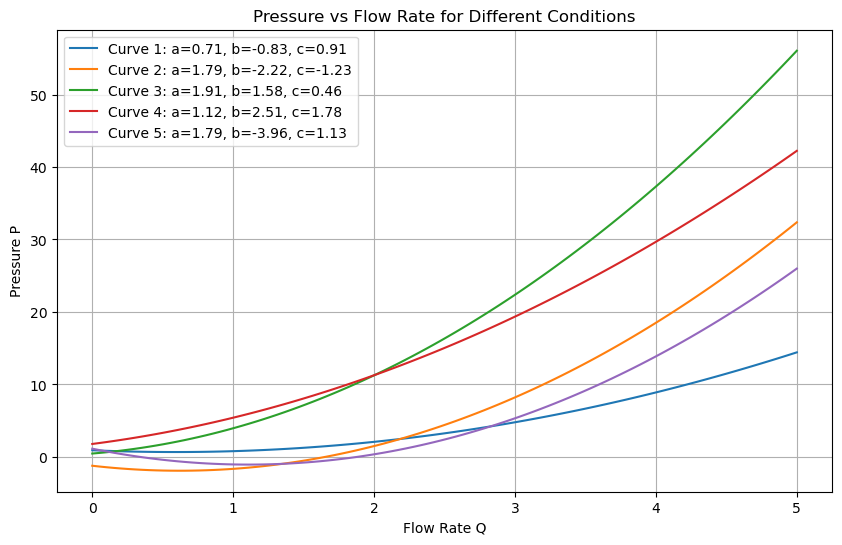

In [8]:
from matplotlib import pyplot as plt

num_samples = 5
a_vals = np.random.uniform(0.5, 2.0, num_samples)
b_vals = np.random.uniform(-4.0, 4.0, num_samples)
c_vals = np.random.uniform(-2.0, 2.0, num_samples)

Q_vals = np.linspace(0, 5, 100)

plt.figure(figsize=(10, 6))
for i in range(num_samples):
    a, b, c = a_vals[i], b_vals[i], c_vals[i]
    P_vals = a * Q_vals**2 + b * Q_vals + c
    plt.plot(Q_vals, P_vals, label=f'Curve {i+1}: a={a:.2f}, b={b:.2f}, c={c:.2f}')

plt.xlabel('Flow Rate Q')
plt.ylabel('Pressure P')
plt.title('Pressure vs Flow Rate for Different Conditions')
plt.legend()
plt.grid(True)
plt.show()

---

## Exercise 2

Discuss how to use bisection method, Newton's method, and secant method to solve this nonlinear equation. Implement these three methods in Python to solve for the flow rate  corresponding to a given pressure difference $P=10$, and $ a=1, b=-3, c=2 $. \
Compare their convergence rates, then visulize the comparison.


Root by Bisection method: 4.701562523841858 with 22 iterations
Root by Newton method: 4.701562118716424 with 6 iterations
Root by Secant method: 4.701562118716484 with 5 iterations


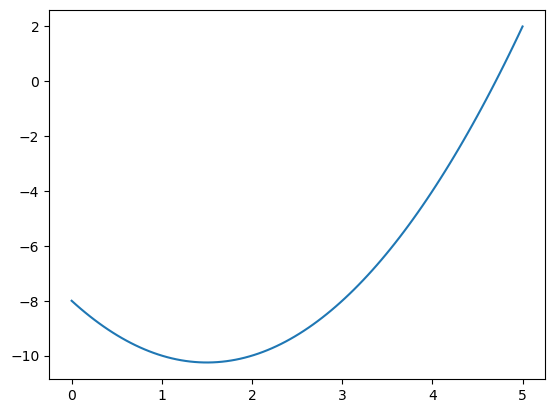

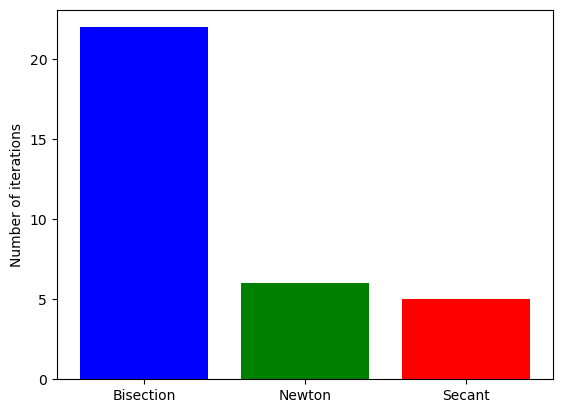

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# define the function
a, b, c = 1, -3, 2
def f(x):
    return a*x**2 - 3*x + 2 - 10

def f_prime(x):
    return 2*a*x - 3

# Bisection method
def bisection_method(f, start, end, tol=1e-6, max_iter=100):
    if f(a)*f(b) > 0:
        raise ValueError("The function must have different signs at the endpoints of the interval")

    for i in range(max_iter):
        c = start + (end-start)/2 # pay attention to the overflow
        if f(c) ==0 or (end-start)/2 < tol:
            return c,i

        if f(c)*f(start) < 0:
            end = c
        else:
            start = c
    
    return c, max_iter

# Newton's method
def newton_method(f, f_prime, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        x_new = x - f(x) / f_prime(x)
        if abs(x_new - x) < tol:
            return x_new, i
        x = x_new
    return x, max_iter

# Secant method
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        if abs(x2 - x1) < tol:
            return x2,i
        x0, x1 = x1, x2
    return x2, max_iter

# output the results
x_0 = 2.0
root_bisection, iter_bisection = bisection_method(f, 0, 5)
root_newton, iter_newton = newton_method(f, f_prime, x_0)
root_secant, iter_secant = secant_method(f, 0, 5)

print(f"Root by Bisection method: {root_bisection} with {iter_bisection} iterations")
print(f"Root by Newton method: {root_newton} with {iter_newton} iterations")
print(f"Root by Secant method: {root_secant} with {iter_secant} iterations")

# visualize
x = np.linspace(0, 5, 100)
y = f(x)
plt.plot(x, y, label='f(x)')
plt.show()
plt.close()

plt.bar(['Bisection', 'Newton', 'Secant'], [iter_bisection, iter_newton, iter_secant], color=['blue', 'green', 'red'])
plt.ylabel('Number of iterations')
plt.show()

---

## Exercise 3

Assume there are two connected pipeline branches with flow rates $Q1$ and $Q2$, and the pressure relationships are:

\begin{cases}
P_1 = a_1 Q_1^2 + b_1 Q_1 + c_1 Q_2\\
P_2 = a_2 Q_2^2 + b_2 Q_2 + c_2 Q_1
\end{cases}

with $P_1 = P_2 = 10$. Choose your $a, b, c$ parameters and solve for $Q_1$ and $Q_2$ using multidimensional Newton's method with Jacobian Matrix, compare the result with **Scipy.optimize.fsolve** and visualize the root finding process with tracing the point ($Q_1$, $Q_2$) using matplotlib.



The root found by newton_system is: (-25.000000341034898, -15.000000274207181)
The root found by fsolve is: [-25. -15.]


Text(0, 0.5, 'Q2')

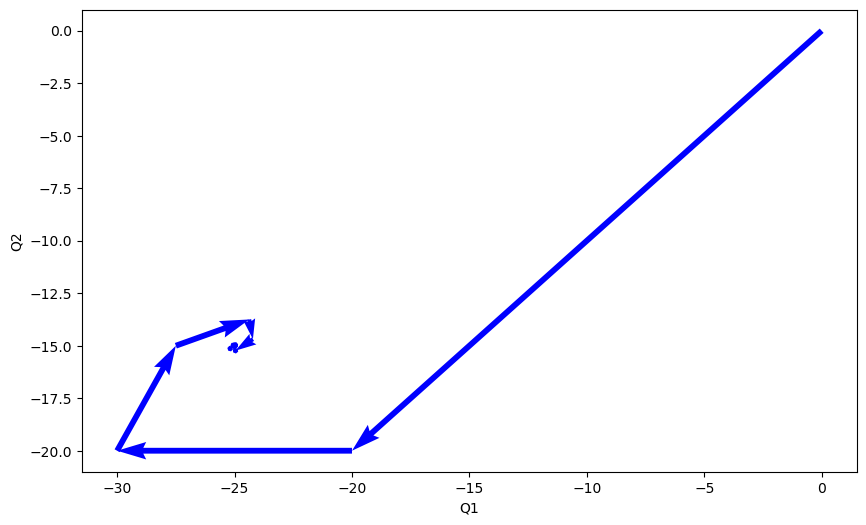

In [10]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Choose a, b, c
a1, b1, c1 = 1, -2, 1
a2, b2, c2 = 1.5, -3, 0.5

# Define the function F and its jacobian J
def F(x):
    return np.array([
        a1*x[0] + b1*x[0] + c1*x[1] - 10, 
        a2*x[1] + b2*x[1] + c2*x[0] - 10
        ])

def J(x):
    return np.array([
        [a1 + b1, c2],
        [c1, a2 + b2]
        ])

# Implement the Newton method for nonlinear systems
def newton_system(F, J, x0, tol=1e-6, max_iter=100):
    X = x0
    Q1_list = np.array([X[0]])
    Q2_list = np.array([X[1]])
    for i in range(max_iter):
        F_x = F(X)
        J_x = J(X)

        S_k = np.linalg.solve(J_x, -F_x)
        X = X + S_k
        Q1_list = np.append(Q1_list, X[0])
        Q2_list = np.append(Q2_list, X[1])
        if np.linalg.norm(S_k) < tol:
            return Q1_list, Q2_list
        
    return Q1_list, Q2_list

# initial guess
x0 = np.array([0, 0])
Q1s, Q2s = newton_system(F, J, x0)
print(f"The root found by newton_system is: {Q1s[-1], Q2s[-1]}")

solution = fsolve(F, x0)
print(f"The root found by fsolve is: {solution}")

# visualize
# add arrows to show the direction
plt.figure(figsize=(10, 6))

plt.quiver(Q1s[:-1], Q2s[:-1], Q1s[1:]-Q1s[:-1], Q2s[1:]-Q2s[:-1], scale_units='xy', angles='xy', scale=1, color='blue')
# or we can also use plt.plot(Q1s, Q2s, 'o-')

plt.xlabel('Q1')
plt.ylabel('Q2')

